### Project- Good and Bad Customers for Granting Credit (Rajendra Prasad Nayak)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp #One Sample t test
from scipy.stats import ttest_ind #Two Independent Variables t test
from scipy.stats import ttest_rel# Two Dependent Samples Paired t test
import seaborn as sns
from scipy.stats import chi2

In [2]:
df = pd.read_csv('Credit_Card_Default.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
print(df.shape)

(30000, 25)


In [4]:
df['SEX'].value_counts(),df['EDUCATION'].value_counts(),df['MARRIAGE'].value_counts()

(2    18112
 1    11888
 Name: SEX, dtype: int64,
 2    14030
 1    10585
 3     4917
 5      280
 4      123
 6       51
 0       14
 Name: EDUCATION, dtype: int64,
 2    15964
 1    13659
 3      323
 0       54
 Name: MARRIAGE, dtype: int64)

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Performing correlation

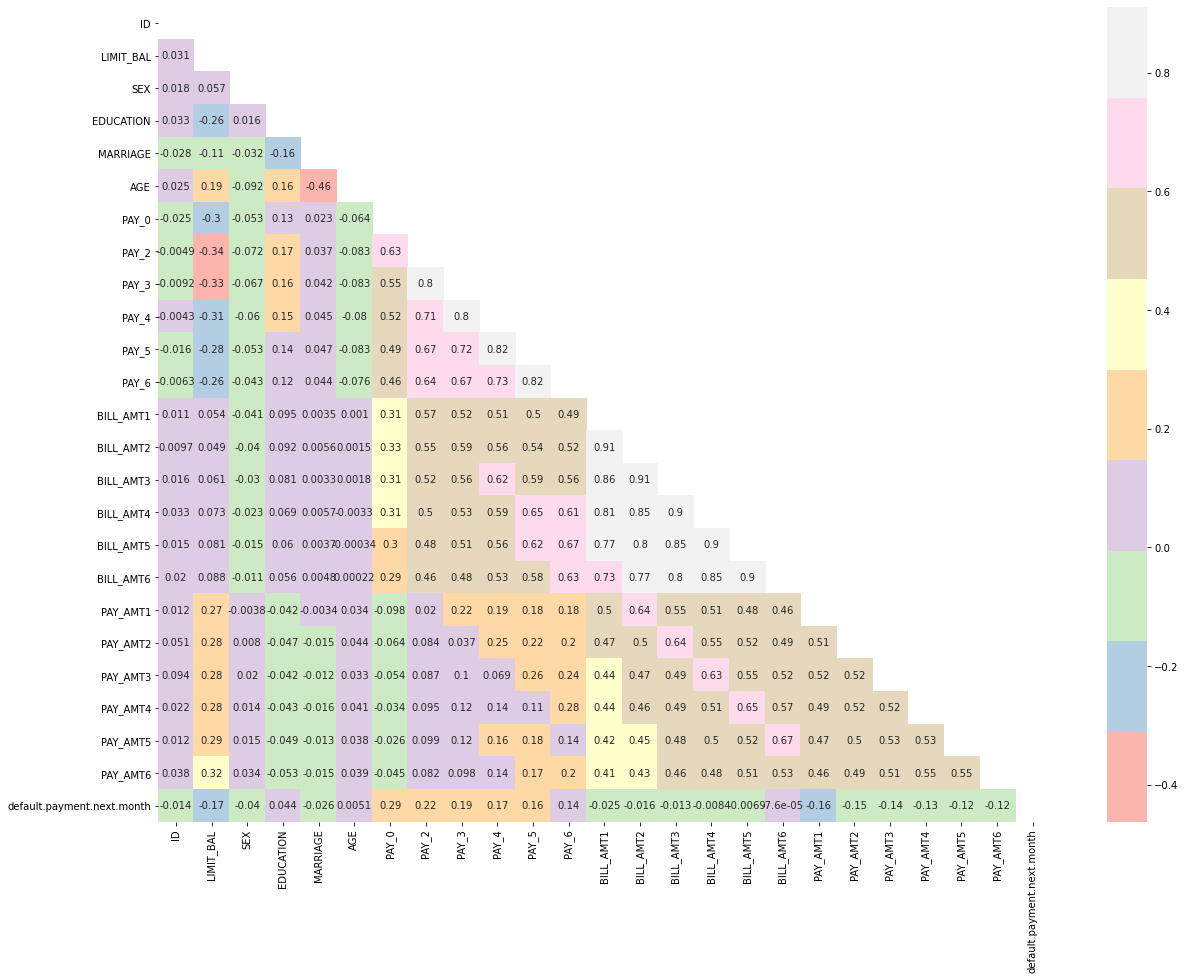

In [7]:
# Performing Correlation
corr_matrix = df.corr(method='spearman')


plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

In [8]:
dx=df.copy()
print(dx.shape)
dx.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
dx.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


##### We can see that all the columns have 3000 counts i,e there is no missing values

In [10]:
dx.rename(columns={'default.payment.next.month':'default_payment'},inplace=True)
dx.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [11]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               30000 non-null  int64  
 1   LIMIT_BAL        30000 non-null  float64
 2   SEX              30000 non-null  int64  
 3   EDUCATION        30000 non-null  int64  
 4   MARRIAGE         30000 non-null  int64  
 5   AGE              30000 non-null  int64  
 6   PAY_1            30000 non-null  int64  
 7   PAY_2            30000 non-null  int64  
 8   PAY_3            30000 non-null  int64  
 9   PAY_4            30000 non-null  int64  
 10  PAY_5            30000 non-null  int64  
 11  PAY_6            30000 non-null  int64  
 12  BILL_AMT1        30000 non-null  float64
 13  BILL_AMT2        30000 non-null  float64
 14  BILL_AMT3        30000 non-null  float64
 15  BILL_AMT4        30000 non-null  float64
 16  BILL_AMT5        30000 non-null  float64
 17  BILL_AMT6   

In [12]:
dx.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

#### Here we can see that there is no missing values, no imputations

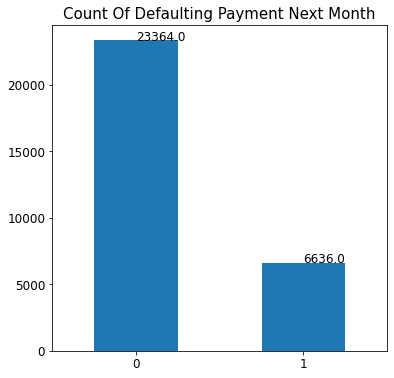

In [13]:
default_count = (dx.default_payment.value_counts(normalize=True)*30000)
default_count.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Count Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],default_count):
    plt.text(x,y,y,fontsize=12)
plt.show()

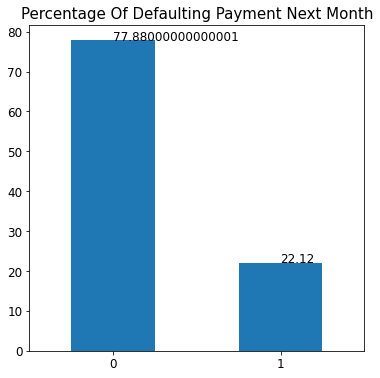

In [14]:
# Normalizing into percentage
default_count = (dx.default_payment.value_counts(normalize=True)*100)
default_count.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentage Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],default_count):
    plt.text(x,y,y,fontsize=12)
plt.show()

#### We can see that 78% are expected next month defaulters & 22% are not.

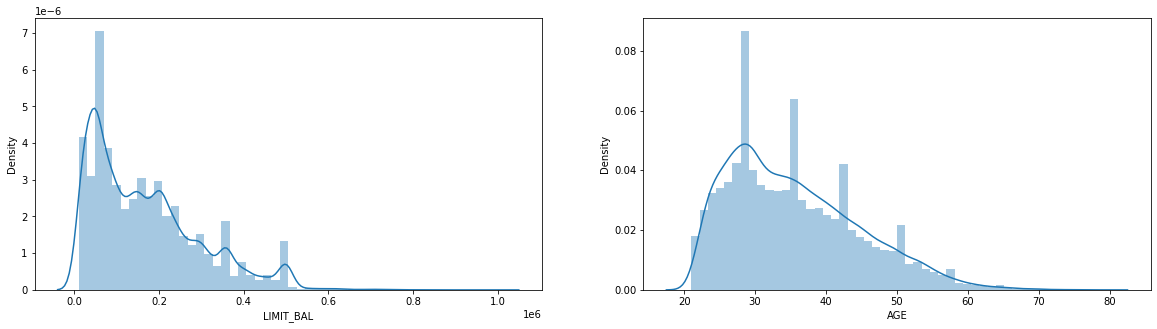

In [15]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(dx.LIMIT_BAL)

plt.subplot(1,2,2)
sns.distplot(dx.AGE)

plt.show()

#### By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
#### We have more number of clients having limiting balance between 0 to 200000 currency.
#### We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
### We will observe the effect of variables on target variable below

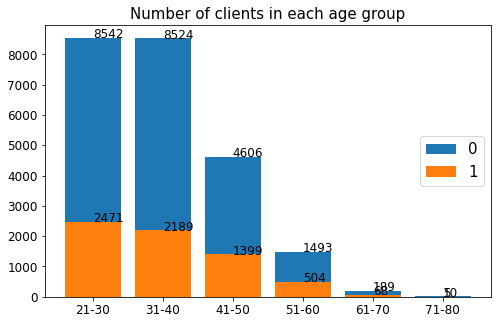

In [16]:
binsss = [20,30,40,50,60,70,80]
age_range = ['21-30','31-40','41-50','51-60','61-70','71-80']
dx['AGE_BIN'] = pd.cut(x=dx.AGE, bins=binsss, labels=age_range, right=True)

age_cnt = dx.AGE_BIN.value_counts()
age_0 = (dx.AGE_BIN[dx['default_payment'] == 0].value_counts())
age_1 = (dx.AGE_BIN[dx['default_payment'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(age_range,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(age_range,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='center right', fontsize=15)
plt.show()

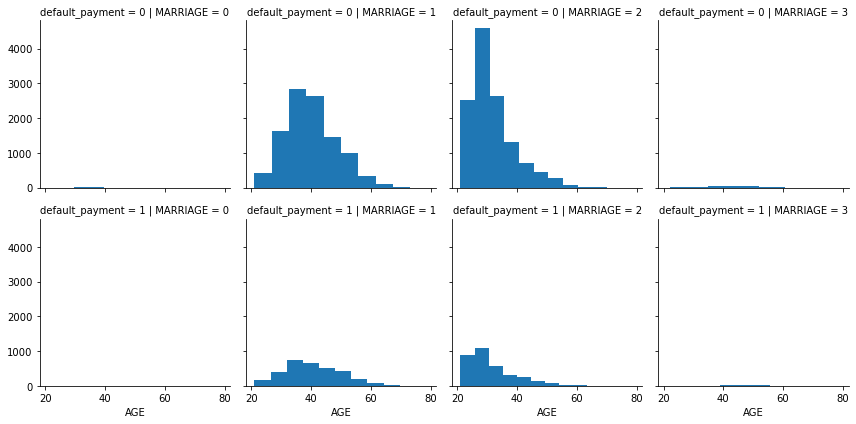

In [17]:
h = sns.FacetGrid(dx, row='default_payment', col='MARRIAGE')
h = h.map(plt.hist, 'AGE')
plt.show()

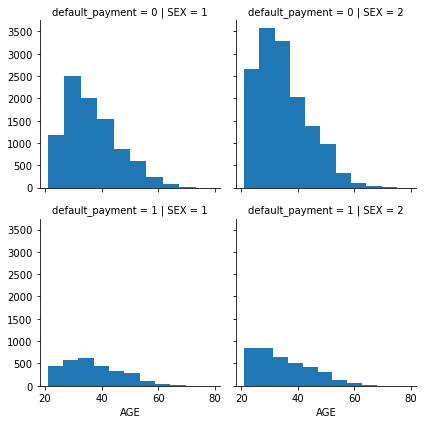

In [18]:
g = sns.FacetGrid(dx, row='default_payment', col='SEX')
g = g.map(plt.hist, 'AGE')

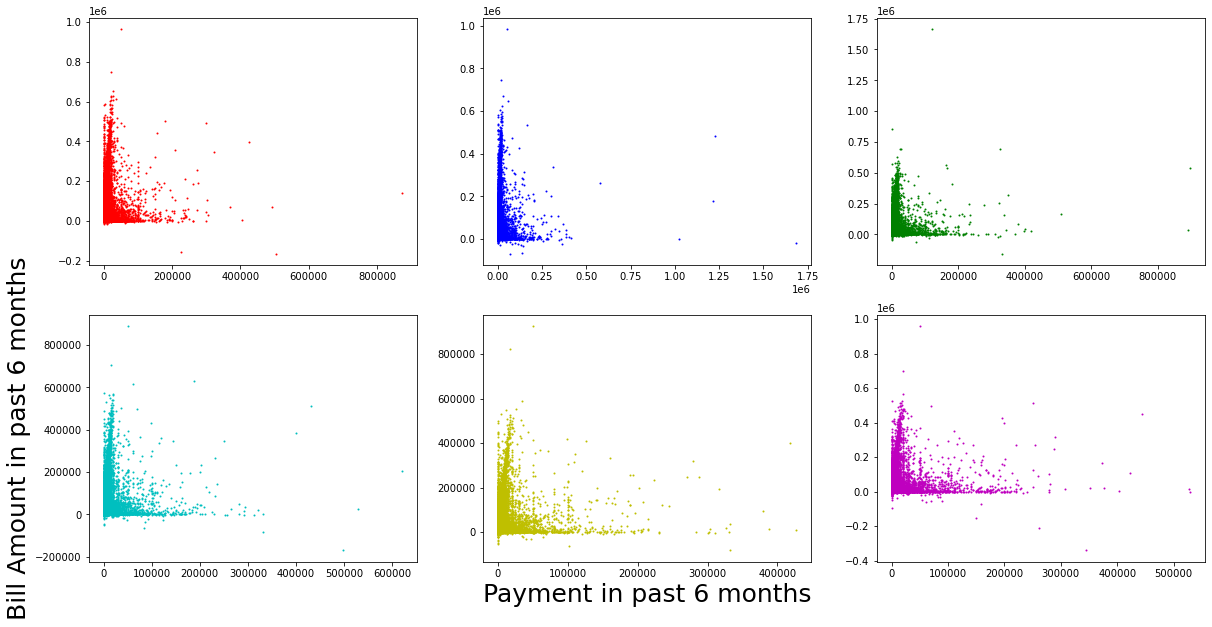

In [19]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=dx.PAY_AMT1, y=dx.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=dx.PAY_AMT2, y=dx.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=dx.PAY_AMT3, y=dx.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=dx.PAY_AMT4, y=dx.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=dx.PAY_AMT5, y=dx.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=dx.PAY_AMT6, y=dx.BILL_AMT6, c='m', s=1)

plt.show()


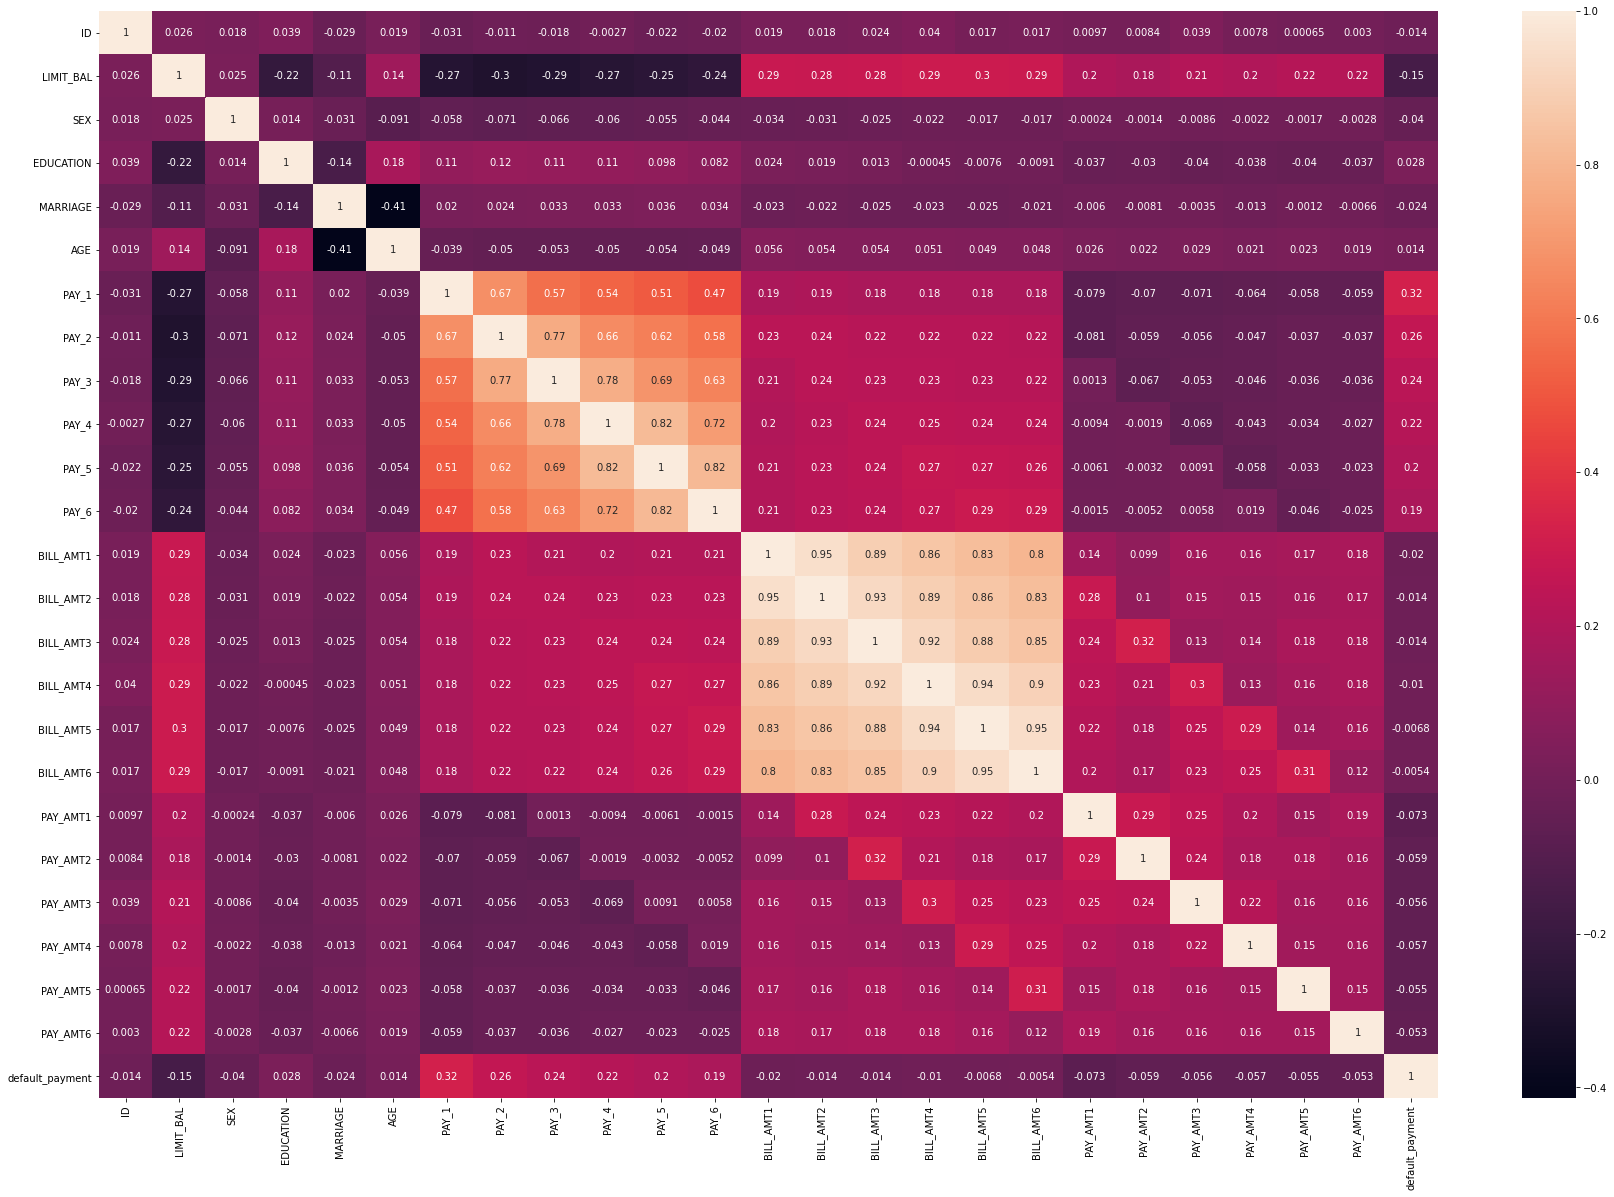

In [20]:
plt.subplots(figsize=(30,20))
sns.heatmap(dx.corr(), annot=True)
plt.show()

In [21]:
dx.drop(columns='BILL_AMT2',inplace=True)

In [22]:
print(dx.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment',
       'AGE_BIN'],
      dtype='object')


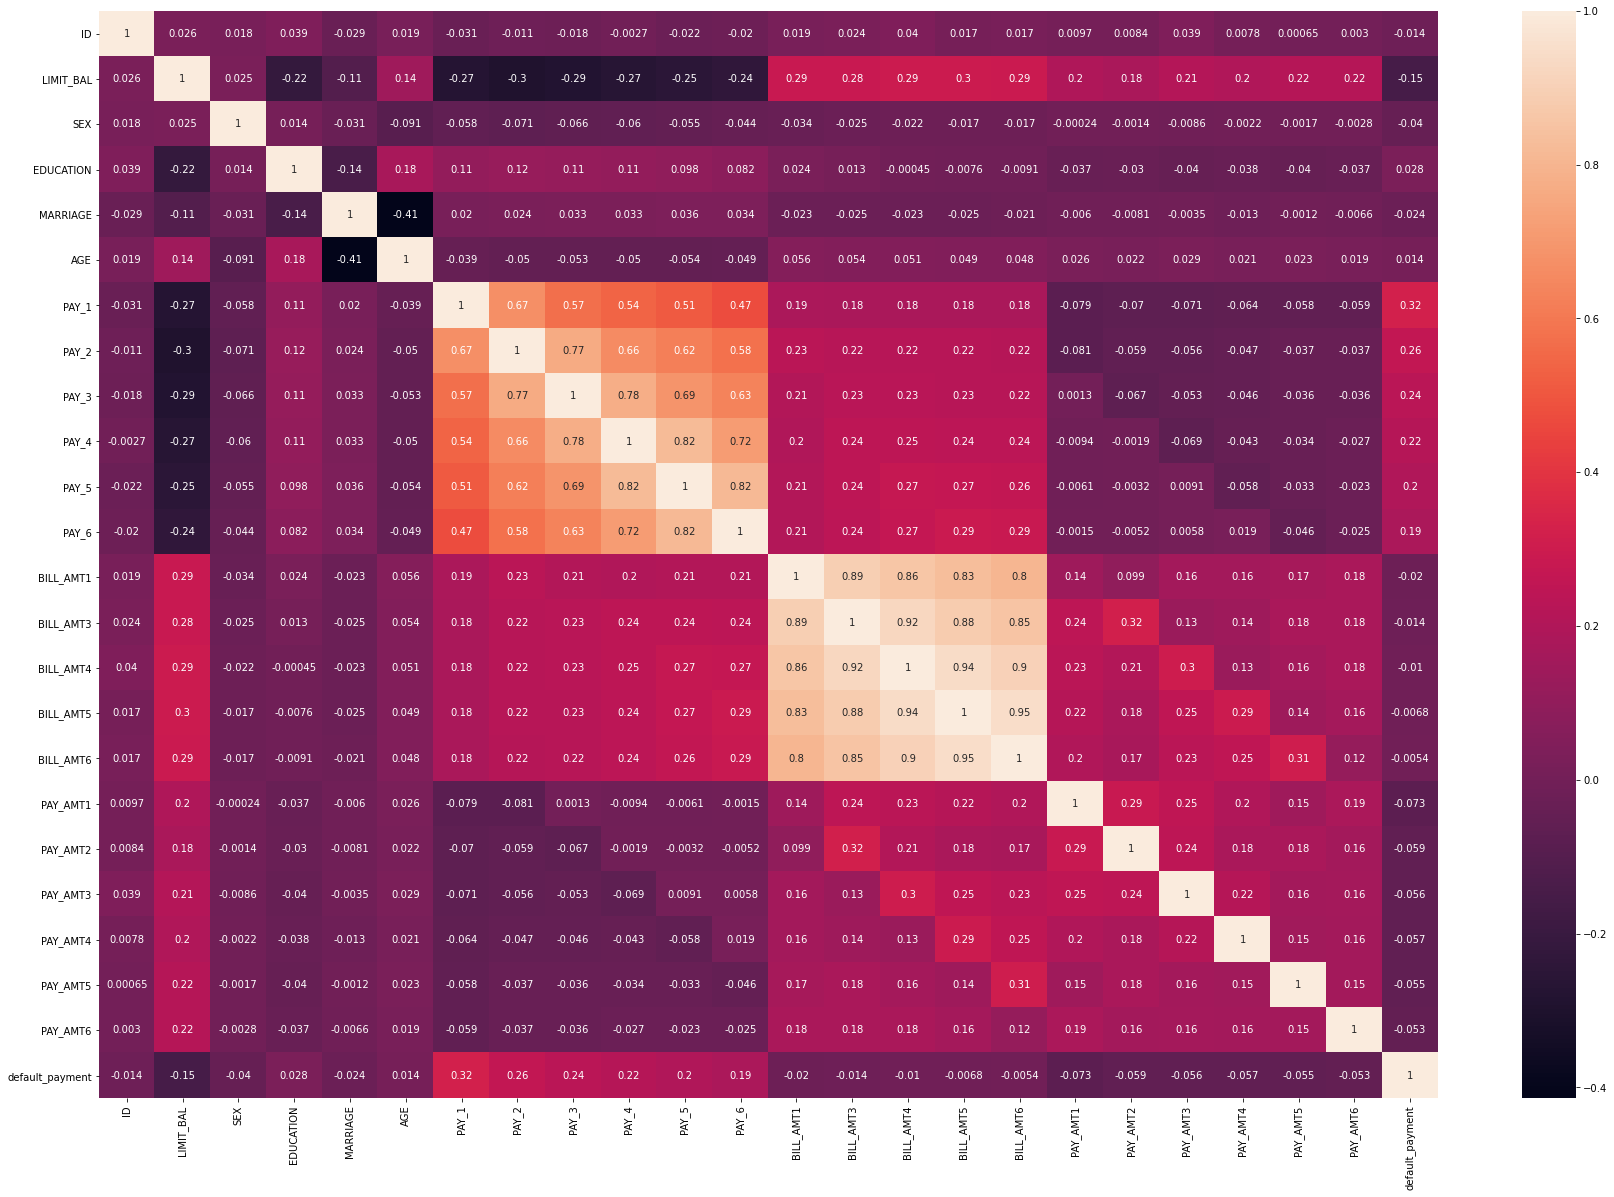

In [23]:
plt.subplots(figsize=(30,20))
sns.heatmap(dx.corr(), annot=True)
plt.show()

In [24]:
dx.drop(columns='BILL_AMT5',inplace=True)
dx

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_BIN
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,31-40
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,41-50
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,31-40
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-50


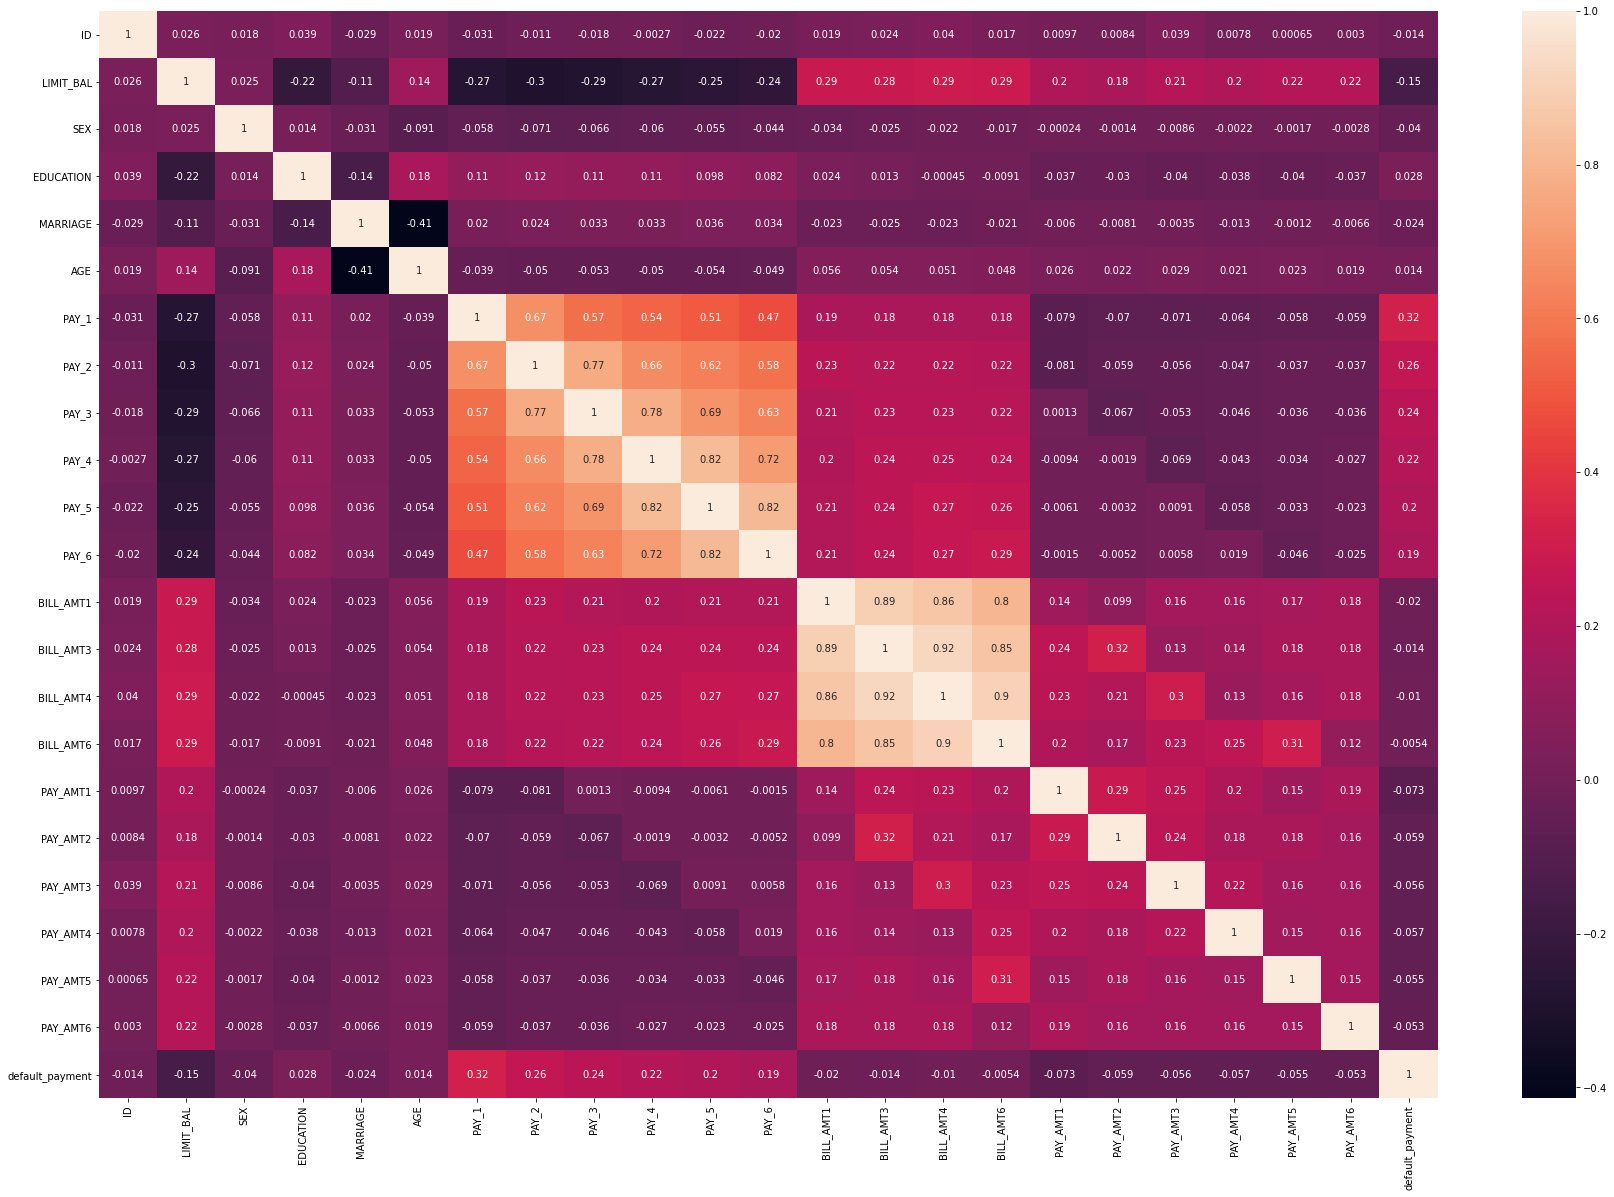

In [25]:
plt.subplots(figsize=(30,20))
sns.heatmap(dx.corr(), annot=True)
plt.show()

In [26]:
dx.drop(columns=['BILL_AMT1','BILL_AMT3'],inplace=True)
dx

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_BIN
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,31-40
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,41-50
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,31-40
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-50


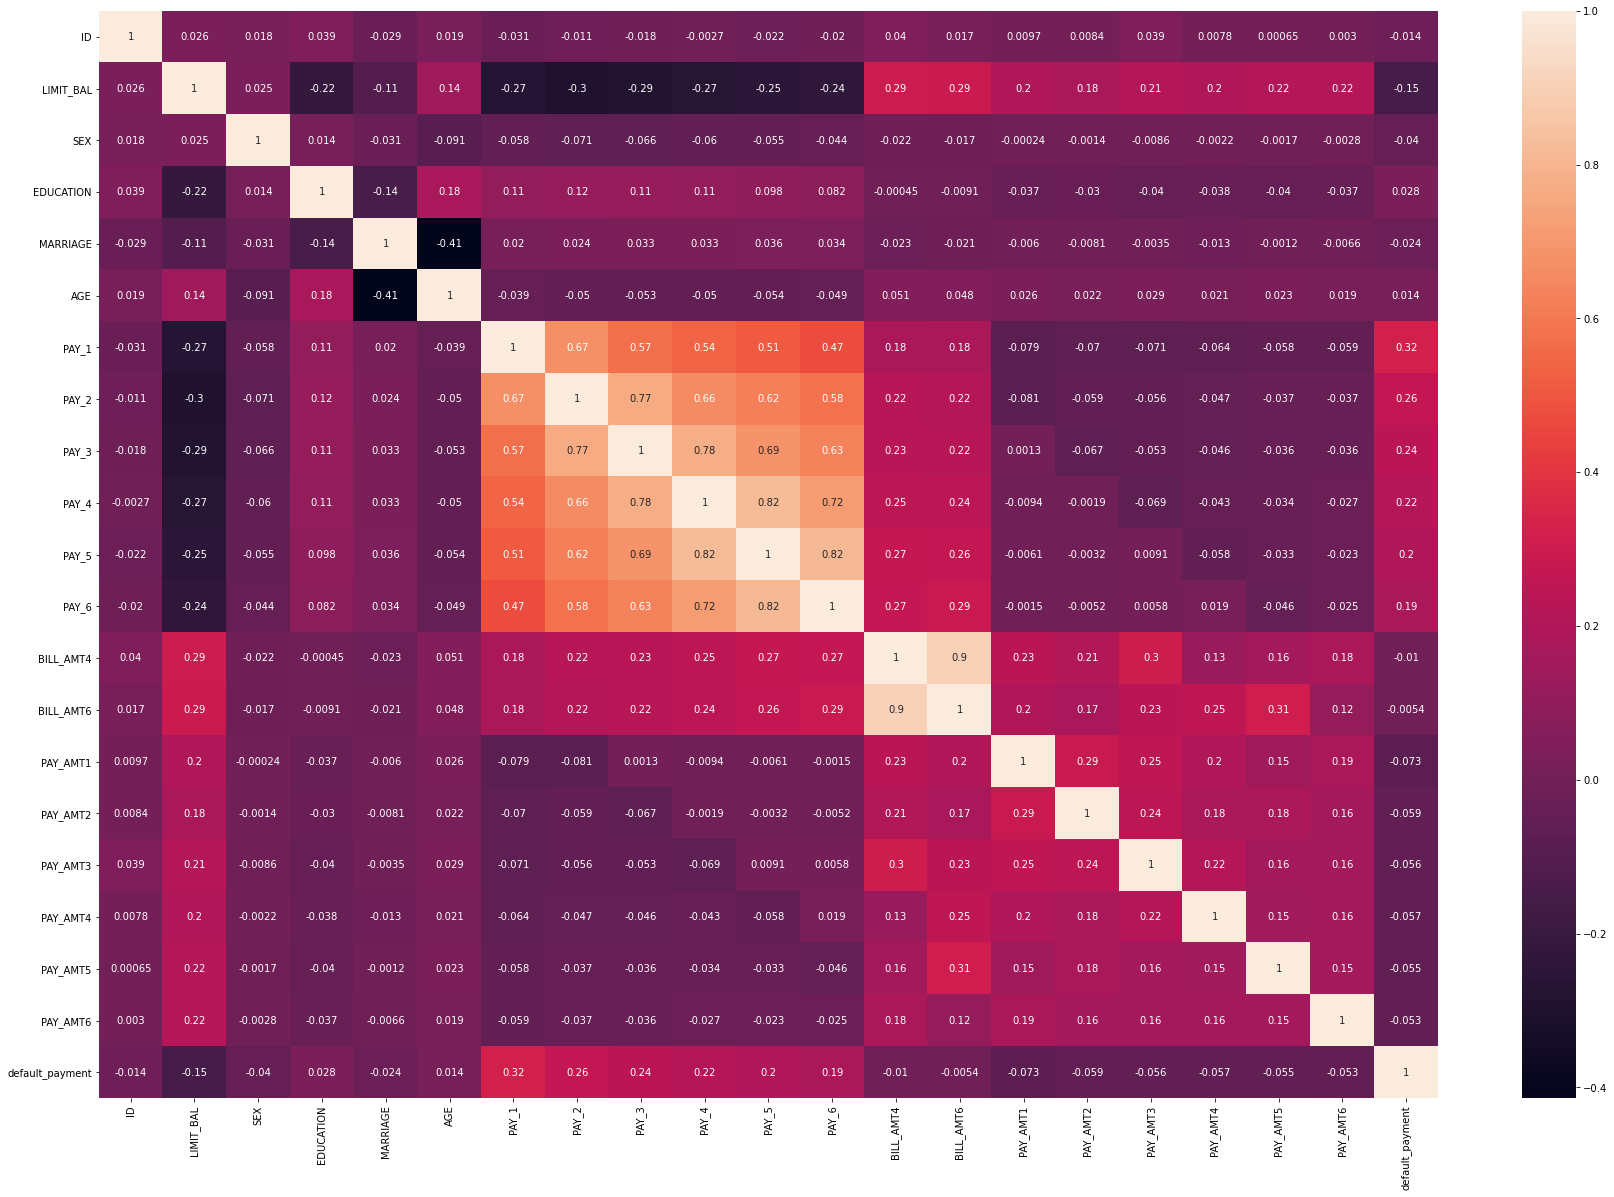

In [27]:
plt.subplots(figsize=(30,20))
sns.heatmap(dx.corr(), annot=True)
plt.show()

In [28]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               30000 non-null  int64   
 1   LIMIT_BAL        30000 non-null  float64 
 2   SEX              30000 non-null  int64   
 3   EDUCATION        30000 non-null  int64   
 4   MARRIAGE         30000 non-null  int64   
 5   AGE              30000 non-null  int64   
 6   PAY_1            30000 non-null  int64   
 7   PAY_2            30000 non-null  int64   
 8   PAY_3            30000 non-null  int64   
 9   PAY_4            30000 non-null  int64   
 10  PAY_5            30000 non-null  int64   
 11  PAY_6            30000 non-null  int64   
 12  BILL_AMT4        30000 non-null  float64 
 13  BILL_AMT6        30000 non-null  float64 
 14  PAY_AMT1         30000 non-null  float64 
 15  PAY_AMT2         30000 non-null  float64 
 16  PAY_AMT3         30000 non-null  float64

In [29]:
#Performing Chi Square test
#Cross Tabulation --> Contingency Table between Payment & Sex
df_table=pd.crosstab(dx['default_payment'],dx['SEX'])
obs_values=df_table.values
val=stats.chi2_contingency(df_table)
Expected_value=val[3]
no_of_rows=len(df_table.iloc[0:10,0]) #Row Index, Column Index
no_of_cols=len(df_table.iloc[0,0:10]) #Row Index, Column Index
ddof=(no_of_rows-1)*(no_of_cols-1)
chi_square=sum([(o-e)**2/e for o,e in zip(obs_values,Expected_value)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print(p_value)
if p_value < 0.05:
    print('Reject Null Hypotesis')
else:
    print('Fail to reject Null Hypothesis')

4.472755499307368e-12
Reject Null Hypotesis


In [30]:
import statistics
df_age = dx["AGE"]
df_agevar = statistics.variance(df_age)
df_agevar

84.96975540851362

In [31]:
df_age = dx["default_payment"]
df_agevar = statistics.variance(df_age)
df_agevar

0.17227630254341808

#### Variance unequal

In [32]:
ttest,p_value=stats.ttest_ind(dx['default_payment'],df['AGE'],equal_var=False)
print(p_value)
if p_value < 0.05:
    print('Reject Null Hypotesis')
else:
    print('Fail to reject Null Hypothesis')

0.0
Reject Null Hypotesis


In [33]:
df_table=pd.crosstab(dx['default_payment'],dx['EDUCATION'])
obs_values=df_table.values
val=stats.chi2_contingency(df_table)
Expected_value=val[3]
no_of_rows=len(df_table.iloc[0:8,0]) #Row Index, Column Index
no_of_cols=len(df_table.iloc[0,0:8]) #Row Index, Column Index
ddof=(no_of_rows-1)*(no_of_cols-1)
chi_square=sum([(o-e)**2/e for o,e in zip(obs_values,Expected_value)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print(p_value)
if p_value < 0.05:
    print('Reject Null Hypotesis')
else:
    print('Fail to reject Null Hypothesis')

4.3718573206064093e-10
Reject Null Hypotesis


#### Since AGE,SEX & EDUCATION rejects null hypothesis with Default payment, So we can say that they are dependent variable

#### Now performing logistic regression

In [34]:
# Performing test train model & logistic regression to checkk the accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
df_X = dx.drop(['default_payment','AGE_BIN'], axis=1)
df_y = dx.default_payment

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=98)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4682 1318]
 [   0    0]]

Accuracy Score for model1:  0.7803333333333333


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

MSE = mean_squared_error(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)
RMSE = sqrt(MSE)
print('Mean_Squared_Error :' ,MSE)
print('Root_Mean_Squared_Error :' ,RMSE)

Mean_Squared_Error : 0.21966666666666668
Root_Mean_Squared_Error : 0.46868610675660816


#### We can say that error in low

### Applying random forest algorithm

Model4 Accuracy score is : 0.8271666666666667
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4682
           1       0.69      0.39      0.50      1318

    accuracy                           0.83      6000
   macro avg       0.77      0.67      0.70      6000
weighted avg       0.81      0.83      0.81      6000



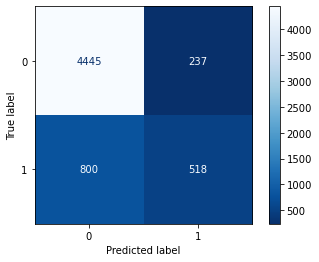

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as sm
from sklearn. metrics import confusion_matrix, plot_confusion_matrix

df_X = dx.drop(['default_payment','AGE_BIN'], axis=1)
df_y = dx.default_payment

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=98)

model4 = RandomForestClassifier()

model4.fit(X_train, y_train)

model4_acc = model4.score(X_test, y_test)

y_pred = model4.predict(X_test)
print('Model4 Accuracy score is :', model4_acc)

print( classification_report(y_test, y_pred) )

plot_confusion_matrix(model4, X_test, y_test, cmap="Blues_r")

plt.show()

#### We can see in random forest algorithm that the accuracy score is 83%

In [37]:
MSE = mean_squared_error(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)
RMSE = sqrt(MSE)
print('Mean_Squared_Error :' ,MSE)
print('Root_Mean_Squared_Error :' ,RMSE)

Mean_Squared_Error : 0.17283333333333334
Root_Mean_Squared_Error : 0.41573228565187637


#### We can see that error is minimum. Hence we can say that Random forest algorithm is better than logistic regression.

#### Performing Naive bayes algorithm

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.25      0.39      4682
           1       0.25      0.89      0.39      1318

    accuracy                           0.39      6000
   macro avg       0.57      0.57      0.39      6000
weighted avg       0.75      0.39      0.39      6000


Accuracy Score for Naive Bayes model:  0.38767
Mean_Squared_Error: 0.61233
Root_Mean_Squared_Error: 0.78252


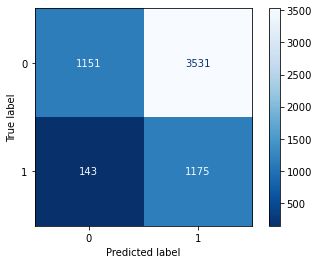

In [38]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,nb_pred))

nb_acc=accuracy_score(y_test,nb_pred)
print('\nAccuracy Score for Naive Bayes model: ', '{0:.5g}'.format(nb_acc))
#Checking the Error values
NB_mse = mean_squared_error(y_test, nb_pred)
NB_rmse = sqrt(NB_mse)
print('Mean_Squared_Error:','{0:.5g}'.format(NB_mse))
print('Root_Mean_Squared_Error:','{0:.5g}'.format(NB_rmse))

plot_confusion_matrix(nb, X_test, y_test, cmap="Blues_r")
plt.show()

#### Since accuracy score in Naive Bayes is very low so we will reject it.